In [1]:
# Bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [2]:
# Leitura dos dados
df = pd.read_excel("SalarioExperiencia.xlsx")
df.head()

,Salario,Experiencia
0,1.9307,0
1,3.1769,17
2,2.2769,8
3,3.1307,15
4,2.7769,9


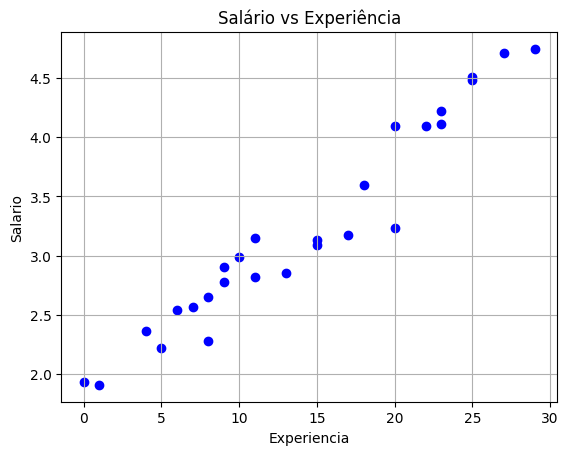

In [3]:
# Visualização inicial dos dados
plt.scatter(df["Experiencia"], df["Salario"], color="blue")
plt.xlabel("Experiencia")
plt.ylabel("Salario")
plt.title("Salário vs Experiência")
plt.grid(True)
plt.show()

In [4]:
# Modelo de Regressão Linear com MQO (para comparação)
X = sm.add_constant(df["Experiencia"])  # adiciona o intercepto
modelo = sm.OLS(df["Salario"], X).fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                Salario   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.939
Method:                 Least Squares   F-statistic:                     403.8
Date:                Sat, 13 Sep 2025   Prob (F-statistic):           6.04e-17
Time:                        15:52:56   Log-Likelihood:                 4.6932
No. Observations:                  27   AIC:                            -5.386
Df Residuals:                      25   BIC:                            -2.795
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           1.8063      0.082     22.134      

A ideia do backpropagation em um modelo linear difere do que é implementado em um contexto de redes neurais. No código, o chamado "backpropagation" está sendo usado de forma genérica, sendo que o que está sendo implementado na prática é o gradiente descendente para ajustamento dos parâmetros de um modelo de regressão linear simples.

Objetivo: ajustar o modelo de regressão linear $\hat{y} = \beta_0 + \beta_1 x$ de modo a encontrar os valores de $\beta_0$ (intercepto) e $\beta_1$ (inclinação) que minimizam o erro quadrático total ($\sum_{i}\left( y_i - \hat{y} \right)^2$).

Apesar de o "backpropagation" em modelos lineares não ser o backpropagation de redes neurais com múltiplas camadas, no código é possível observar que segue o mesmo princípio de propagação do erro para atualizar os pesos.

A ideia é:
1. Calcular o erro atual $e_i = y_i - \hat{y}$
2. Calcular os gradientes da função de erro em relação a cada parâmetro
  * $\frac{\partial SSE}{\partial \beta_0} = -2 \sum e_i$
  * $\frac{\partial SSE}{\partial \beta_1} = -2 \sum e_i x_i$
3. Atualizar os parâmetros na direção oposta ao gradiente $\beta_j \gets \beta_j - \eta \frac{\partial SSE}{\partial \beta_j}$, onde $\eta$ é a taxa de aprendizado (*learning rate*).

Esse processo é repetido diversas vezes (várias iterações) até que os parâmetros convirjam para valores que minimizam o erro.

In [5]:
# Implementação do algoritmo Backpropagation (gradiente descendente)
y = df["Salario"].values
x = df["Experiencia"].values

beta = np.array([0.0, 0.0])  # [intercepto, inclinação]
lrate = 0.0001               # taxa de aprendizado
steps = 10000                # número de iterações
vec_SQE = np.empty(steps)    # armazenar o SSE

for s in range(steps):
    y_pred = beta[0] + beta[1] * x
    erro = y - y_pred

    # Atualização dos parâmetros (gradiente descendente)
    beta[0] -= lrate * (-1) * np.sum(erro)
    beta[1] -= lrate * (-1) * np.sum(erro * x)

    # Cálculo do erro quadrático
    vec_SQE[s] = np.sum((erro) ** 2)

    print(f"{s+1}: {vec_SQE[s]}")

1: 300.52079949999995
2: 44.91085644305706
3: 24.460642218192213
4: 22.800104498017078
5: 22.640927659749877
6: 22.601747400432586
7: 22.572190440649944
8: 22.54343773035307
9: 22.514784566003087
10: 22.486174593475972
11: 22.45760326287301
12: 22.42907016359946
13: 22.40057521586055
14: 22.37211836635579
15: 22.343699563964357
16: 22.31531875780224
17: 22.286975897066917
18: 22.258670931024906
19: 22.230403809010564
20: 22.202174480426073
21: 22.173982894741215
22: 22.14582900149336
23: 22.117712750287332
24: 22.089634090795343
25: 22.061592972756873
26: 22.03358934597864
27: 22.00562316033443
28: 21.977694365765068
29: 21.949802912278304
30: 21.921948749948744
31: 21.89413182891771
32: 21.866352099393236
33: 21.838609511649874
34: 21.810904016028687
35: 21.78323556293714
36: 21.755604102849
37: 21.728009586304225
38: 21.700451963908936
39: 21.67293118633527
40: 21.645447204321332
41: 21.61799996867109
42: 21.590589430254266
43: 21.563215540006293
44: 21.535878248928203
45: 21.5085775

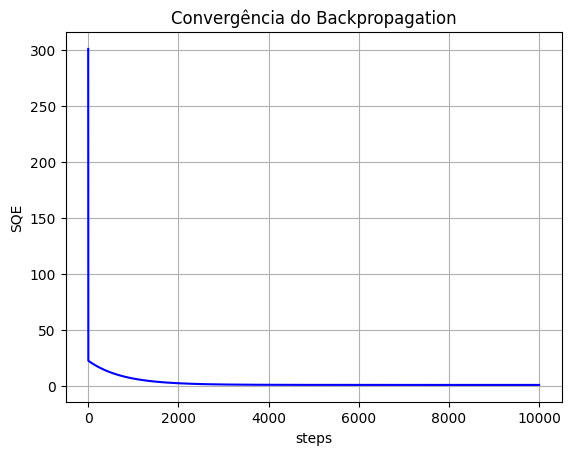

In [6]:
# Gráfico da convergência
plt.plot(vec_SQE, color="blue")
plt.xlabel("steps")
plt.ylabel("SQE")
plt.title("Convergência do Backpropagation")
plt.grid(True)
plt.show()

In [7]:
# Comparação entre MQO e Backpropagation
print("\nMínimos Quadrados:", modelo.params.values)
print("Backpropagation:", beta)


Mínimos Quadrados: [1.80633033 0.10075927]
Backpropagation: [1.80409651 0.10087836]


/tmp/ipython-input-2779540209.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_hat_ols = modelo.params[0] + modelo.params[1] * x_grid


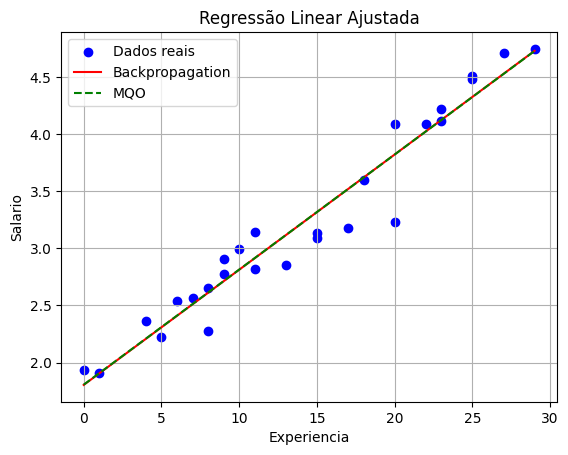

In [8]:
# Gráfico dos pontos com a curva ajustada
plt.scatter(x, y, color="blue", label="Dados reais")

# reta estimada pelo backpropagation
x_grid = np.linspace(x.min(), x.max(), 100)
y_hat_backprop = beta[0] + beta[1] * x_grid
plt.plot(x_grid, y_hat_backprop, color="red", label="Backpropagation")

# reta estimada pelo MQO (OLS)
y_hat_ols = modelo.params[0] + modelo.params[1] * x_grid
plt.plot(x_grid, y_hat_ols, color="green", linestyle="--", label="MQO")

plt.xlabel("Experiencia")
plt.ylabel("Salario")
plt.title("Regressão Linear Ajustada")
plt.legend()
plt.grid(True)
plt.show()

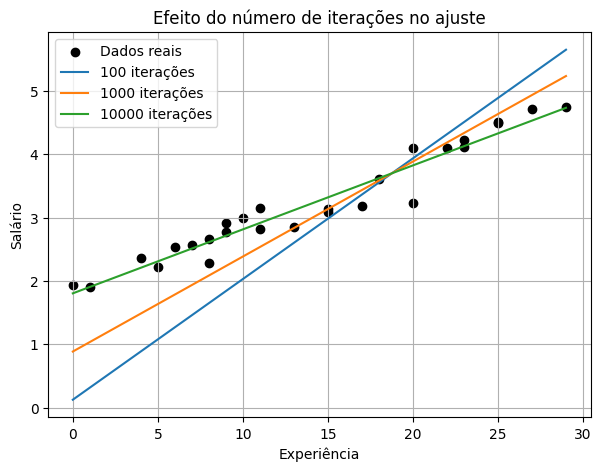

In [9]:
# Considerando diferentes números de iterações

# Dados
x = df["Experiencia"].values
y = df["Salario"].values

def gradiente_descendente(x, y, steps, lrate=0.0001):
    beta = np.array([0.0, 0.0])
    for _ in range(steps):
        y_pred = beta[0] + beta[1] * x
        erro = y - y_pred
        beta[0] -= lrate * (-1) * np.sum(erro)
        beta[1] -= lrate * (-1) * np.sum(erro * x)
    return beta

# Números de iterações para comparar
steps_list = [100, 1000, 10000]

# Geração do gráfico
plt.figure(figsize=(7,5))
plt.scatter(x, y, color="black", label="Dados reais")

x_grid = np.linspace(x.min(), x.max(), 100)

for steps in steps_list:
    beta = gradiente_descendente(x, y, steps)
    y_pred = beta[0] + beta[1] * x_grid
    plt.plot(x_grid, y_pred, label=f"{steps} iterações")

plt.xlabel("Experiência")
plt.ylabel("Salário")
plt.title("Efeito do número de iterações no ajuste")
plt.legend()
plt.grid(True)
plt.show()


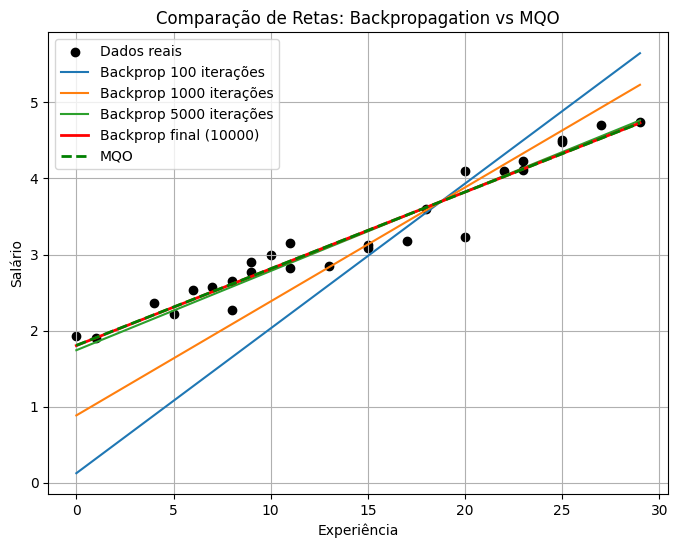

In [10]:
# Inclusão da reta de Backpropagation

# Dados
x = df["Experiencia"].values
y = df["Salario"].values

# Função gradiente descendente
def gradiente_descendente(x, y, steps, lrate=0.0001):
    beta = np.array([0.0, 0.0])
    for _ in range(steps):
        y_pred = beta[0] + beta[1] * x
        erro = y - y_pred
        beta[0] -= lrate * (-1) * np.sum(erro)
        beta[1] -= lrate * (-1) * np.sum(erro * x)
    return beta

# MQO para referência
X_mqo = sm.add_constant(x)
modelo = sm.OLS(y, X_mqo).fit()

# Lista de iterações para comparar
steps_list = [100, 1000, 5000]

# Plot inicial
plt.figure(figsize=(8,6))
plt.scatter(x, y, color="black", label="Dados reais")

x_grid = np.linspace(x.min(), x.max(), 100)

# Traçar retas para diferentes números de iterações
for steps in steps_list:
    beta = gradiente_descendente(x, y, steps)
    y_pred = beta[0] + beta[1] * x_grid
    plt.plot(x_grid, y_pred, label=f"Backprop {steps} iterações")

# Reta final do backpropagation (usando o maior número de iterações)
beta_final = gradiente_descendente(x, y, 10000)
y_hat_final = beta_final[0] + beta_final[1] * x_grid
plt.plot(x_grid, y_hat_final, color="red", linewidth=2, label="Backprop final (10000)")

# Reta do MQO
y_hat_mqo = modelo.params[0] + modelo.params[1] * x_grid
plt.plot(x_grid, y_hat_mqo, color="green", linestyle="--", linewidth=2, label="MQO")

plt.xlabel("Experiência")
plt.ylabel("Salário")
plt.title("Comparação de Retas: Backpropagation vs MQO")
plt.legend()
plt.grid(True)
plt.show()
